## P6 Classification automatique des biens de consommation

## Partie 1: Classification des images

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
textdf=pd.read_csv('/Users/riina//Downloads/flipkart_com-ecommerce_sample_1050.csv')

In [3]:
textdf

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [4]:
textdf2=textdf.copy()

In [5]:
textdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [6]:
textdf2['product_category_tree'] = textdf2['product_category_tree'].astype('string')

In [7]:
textdf2[['category0', 'category1','category2']] = textdf2['product_category_tree'].str.split('>>', 2, expand=True)

In [8]:
textdf2["category0"]= textdf2["category0"].str[2:]

In [9]:
textdf2["category0"] = textdf2["category0"].str[:-1]

In [10]:
textdf2

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category0,category1,category2
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains >> Elegance Polyester Multicolor Abs...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels >> Sathiyas Baby Bath Towels...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels >> Eurospa Baby Bath Towels ...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets >> SANTOSH ROYAL FASHION Bedsheets ...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets >> Jaipur Print Bedsheets >> Jaipur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,"Stickers >> Oren Empower Stickers""]"
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,"Stickers >> Wallmantra Stickers""]"
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.co

In [11]:
testdf2=textdf2.copy()

In [12]:
testdf2.groupby('category1').count()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category0,category2
category1,,,,,,,,,,,,,,,,,
Baby & Kids Gifts,15,15,15,15,15,15,15,15,15,15,15,15,15,11,15,15,15
Baby Bath & Skin,14,14,14,14,14,14,13,13,14,14,14,14,14,14,14,14,14
Baby Bedding,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Baby Grooming,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4
Bar & Glassware,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tableware & Cutlery,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Tidy Home Furnishing,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Wall Decor & Clocks,22,22,22,22,22,22,22,22,22,22,22,22,22,20,22,22,22


In [13]:
testdf2.groupby('category0').count()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category1,category2
category0,,,,,,,,,,,,,,,,,
Baby Care,150,150,150,150,150,150,149,149,150,150,150,150,150,134,150,150,150
Beauty and Personal Care,150,150,150,150,150,150,150,150,150,150,150,150,150,41,150,150,150
Computers,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
Home Decor & Festive Needs,150,150,150,150,150,150,150,150,150,150,150,150,150,148,149,150,149
Home Furnishing,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,148
Kitchen & Dining,150,150,150,150,150,150,150,150,150,150,150,150,150,79,150,150,150
Watches,150,150,150,150,150,150,150,150,150,150,150,150,150,10,150,150,150


In [14]:
testdf= textdf2[["uniq_id","category0","category1"]]

In [15]:
testdf

,uniq_id,category0,category1
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing,Curtains & Accessories
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care,Baby Bath & Skin
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care,Baby Bath & Skin
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing,Bed Linen
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing,Bed Linen
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Baby Care,Baby & Kids Gifts
1046,fd6cbcc22efb6b761bd564c28928483c,Baby Care,Baby & Kids Gifts
1047,5912e037d12774bb73a2048f35a00009,Baby Care,Baby & Kids Gifts
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Baby Care,Baby & Kids Gifts


In [16]:
testdf=testdf.set_index('uniq_id') 

In [17]:
dftest=testdf.groupby('category0')['category1'].value_counts()

In [18]:
dftest

category0         category1                
Baby Care          Infant Wear                  84
                   Baby & Kids Gifts            15
                   Baby Bedding                 15
                   Baby Bath & Skin             14
                   Feeding & Nursing             8
                                              ... 
Kitchen & Dining   Dinnerware & Crockery         1
                   Housekeeping & Laundry        1
                   Pressure Cookers & Pans       1
Watches            Wrist Watches               149
                   Clocks                        1
Name: category1, Length: 63, dtype: int64

In [19]:
dftest=testdf.groupby(['category0', 'category1']).size().reset_index(name='counts')

In [20]:
dftest

,category0,category1,counts
0,Baby Care,Baby & Kids Gifts,15
1,Baby Care,Baby Bath & Skin,14
2,Baby Care,Baby Bedding,15
3,Baby Care,Baby Grooming,4
4,Baby Care,Diapering & Potty Training,7
...,...,...,...
58,Kitchen & Dining,Lighting,7
59,Kitchen & Dining,Pressure Cookers & Pans,1
60,Kitchen & Dining,Tableware & Cutlery,3
61,Watches,Clocks,1


In [21]:
testdf= dftest[["counts","category0","category1"]]

In [22]:
labels=list(testdf["category0"])

In [23]:
lab=np.unique(labels)
lab

array(['Baby Care', 'Beauty and Personal Care', 'Computers',
       'Home Decor & Festive Needs', 'Home Furnishing',
       'Kitchen & Dining', 'Watches'], dtype='<U26')

[None, Text(0.5, 1.0, 'Categories')]

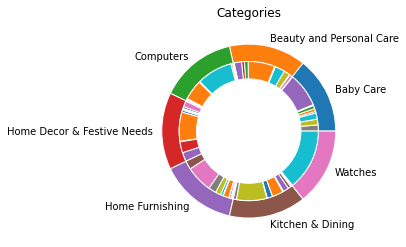

In [24]:
size = 0.2
fig, ax = plt.subplots()

ax.pie(testdf.groupby('category0')['counts'].sum(), radius=1, labels=lab,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(testdf['counts'], radius=1-size, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Categories')

In [25]:
textdf3 = textdf2[["description"]]

In [26]:
df = textdf2[["description","category0","category1"]]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  1050 non-null   object
 1   category0    1050 non-null   string
 2   category1    1050 non-null   string
dtypes: object(1), string(2)
memory usage: 24.7+ KB


In [28]:
import re

df['description_processed'] = df['description'].map(lambda x: re.sub('[^a-z\s]+', ' ', x,flags=re.IGNORECASE))

/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/ipykernel_66709/3402676531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_processed'] = df['description'].map(lambda x: re.sub('[^a-z\s]+', ' ', x,flags=re.IGNORECASE))


In [29]:
df['description_processed'] = df['description_processed'].map(lambda x: x.strip())

/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/ipykernel_66709/3298110919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_processed'] = df['description_processed'].map(lambda x: x.strip())


In [30]:
df['description_processed'] = df['description_processed'].map(lambda x: x.lower())

/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/ipykernel_66709/2079705087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_processed'] = df['description_processed'].map(lambda x: x.lower())


In [31]:
df['description_processed'] = df['description_processed'].map(lambda x: re.sub('(\s+)', ' ', x))

/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/ipykernel_66709/3530539750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_processed'] = df['description_processed'].map(lambda x: re.sub('(\s+)', ' ', x))


In [32]:
df

,description,category0,category1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key features of elegance polyester multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specifications of sathiyas cotton bath towel b...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key features of eurospa cotton terry face towe...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key features of santosh royal fashion cotton p...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key features of jaipur print cotton floral kin...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack of...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigmented polyvinyl f...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker fo...


In [33]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/riina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/riina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
def lemmatize_string(str_arg):
    
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    tokens = tokenizer.tokenize(str_arg.lower())
    tokens = [lemmatizer.lemmatize(
                        lemmatizer.lemmatize(
                            lemmatizer.lemmatize(w,'n'),'a'),'v') for w in tokens]
    lemmatized_string = ' '.join(tokens)
    return lemmatized_string

In [35]:
df['description_processed']= df['description_processed'].apply(lemmatize_string)

/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/ipykernel_66709/4018301849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_processed']= df['description_processed'].apply(lemmatize_string)


In [36]:
df

,description,category0,category1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key feature of elegance polyester multicolor a...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specification of sathiyas cotton bath towel ba...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key feature of eurospa cotton terry face towel...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key feature of santosh royal fashion cotton pr...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key feature of jaipur print cotton floral king...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack of...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigment polyvinyl fil...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker fo...


In [37]:
def remove_stopwords(str_arg, stopwords_list):
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(str_arg.lower())
    cleaned_tokens = [x for x in tokens if x not in stopwords_list]
    cleaned_string = ' '.join(cleaned_tokens)
    return cleaned_string

In [38]:
stopwords_list = nltk.corpus.stopwords.words('english')
df['description_processed']= df['description_processed'].apply(lambda x : remove_stopwords(x, stopwords_list))
df

/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/ipykernel_66709/3790715065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description_processed']= df['description_processed'].apply(lambda x : remove_stopwords(x, stopwords_list))


,description,category0,category1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key feature elegance polyester multicolor abst...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specification sathiyas cotton bath towel bath ...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key feature eurospa cotton terry face towel se...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key feature santosh royal fashion cotton print...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key feature jaipur print cotton floral king si...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack pr...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigment polyvinyl fil...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker r ...


In [39]:
baby= df[df['category0']=='Baby Care']
beauty= df[df['category0']=='Beauty and Personal Care']
computers= df[df['category0']=='Computers']
decor= df[df['category0']=='Home Decor & Festive Needs']
home= df[df['category0']=='Home Furnishing']
kitchen= df[df['category0']=='Kitchen & Dining']
watches= df[df['category0']=='Watches']

## World clouds 

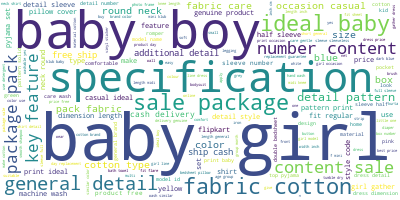

In [40]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
blong_string = ','.join(list(baby['description_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(blong_string)
# Visualize the word cloud
wordcloud.to_image()

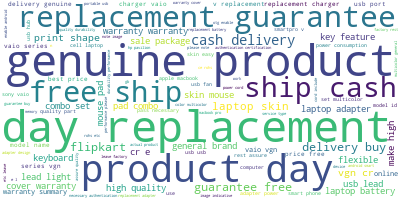

In [41]:
clong_string = ','.join(list(computers['description_processed'].values))
wordcloud.generate(clong_string)
wordcloud.to_image()

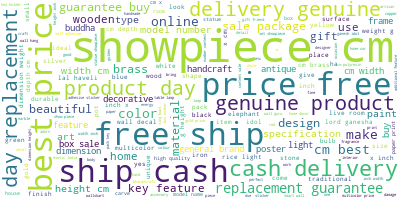

In [42]:
dlong_string = ','.join(list(decor['description_processed'].values))
wordcloud.generate(dlong_string)
wordcloud.to_image()

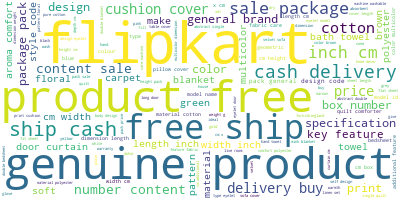

In [43]:
hlong_string = ','.join(list(home['description_processed'].values))
wordcloud.generate(hlong_string)
wordcloud.to_image()

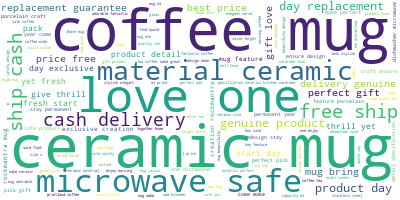

In [44]:
klong_string = ','.join(list(kitchen['description_processed'].values))
wordcloud.generate(klong_string)
wordcloud.to_image()

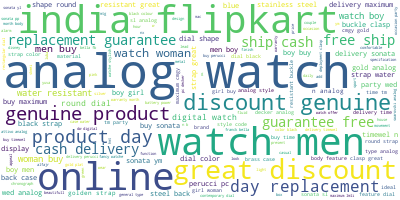

In [45]:
wlong_string = ','.join(list(watches['description_processed'].values))
wordcloud.generate(wlong_string)
wordcloud.to_image()

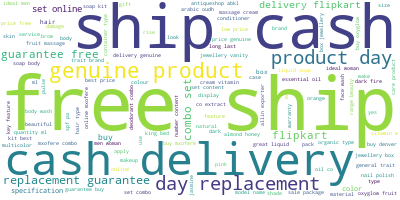

In [46]:
belong_string = ','.join(list(beauty['description_processed'].values))
wordcloud.generate(belong_string)
wordcloud.to_image()

In [47]:
textdf3=df.copy()

In [48]:
df

,description,category0,category1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key feature elegance polyester multicolor abst...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specification sathiyas cotton bath towel bath ...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key feature eurospa cotton terry face towel se...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key feature santosh royal fashion cotton print...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key feature jaipur print cotton floral king si...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack pr...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigment polyvinyl fil...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker r ...


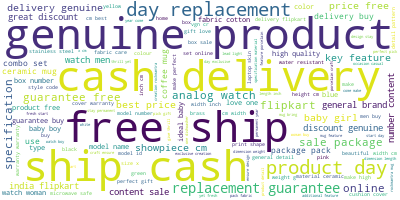

In [49]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['description_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [50]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
all_words = tokenizer.tokenize(' '.join(df['description']))

# Display number of words
print('Before cleaning')
print('Number of words: {}'.format(len(all_words)))

# Display number of unique word
print('Number of unique words: {}'.format(len(set(all_words))))

Before cleaning
Number of words: 81563
Number of unique words: 7670


In [51]:
# Same after cleaning
all_words_cleaned = tokenizer.tokenize(' '.join(df['description_processed']))

# Display number of words
print('After cleaning')
print('Number of words: {}'.format(len(all_words_cleaned)))
print('Number of unique words: {}'.format(len(set(all_words_cleaned))))

After cleaning
Number of words: 56972
Number of unique words: 4294


In [52]:
from sklearn import manifold, decomposition
def pca99(X):
    '''function reduce dimensions using t-SNE PCA keeping 99% of variance, returns np array and df '''
    
    print('dim before PCA : ', X.shape)
    pca = decomposition.PCA(n_components=0.99)
    X_pca = pca.fit_transform(X)
    print('dim after PCA : ', X_pca.shape)
    df_pca = pd.DataFrame(X_pca)
    return X_pca, df_pca


def tsne(X, n):
    '''function to reduce dimensions using t-SNE with n compotents, returns np array and df'''
    t = time.time()
    tsne = manifold.TSNE(n_components=n,
                         perplexity=30,
                         n_iter=2000, init='random', random_state=6)
    X_tsne = tsne.fit_transform(X)

    columns = []
    for i in range(1, n+1):
        columns.append('tsne'+str(i))
    df_tsne = pd.DataFrame(X_tsne, columns=columns)

    d = time.time() - t
    print('dim after t-SNE : ', X_tsne.shape)
    print('timing : ', '%15.2f' % d, 's')
    return X_tsne, df_tsne

In [53]:
def get_clusters(X, n) : 
    from sklearn import cluster
    cls = cluster.KMeans(n_clusters=n, random_state=0)
    cls.fit(X)
    labels = cls.labels_
    centers = pd.DataFrame(cls.cluster_centers_)
    return labels, centers

In [54]:
def conf_mat_transform(conf_mat) :
    '''function to re-assign clusters by maximizing the diagonal of the confusion matrix'''

    # Inverse the number of items per categories (in order to use following function)
    conf_mat_temp = 1 /(conf_mat + 0.001)
    
    # apply function to get the combination of columns to minimize the diagonal 
    from scipy.optimize import linear_sum_assignment
    row_ind, col_ind = linear_sum_assignment(conf_mat_temp)

    # transform matrix according to new columns combination
    conf_mat_transform = conf_mat[:, col_ind]
    
    # reverse liste of column index
    corresp = col_ind.tolist()
    
    return corresp, conf_mat_transform

In [55]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler,  Normalizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import manifold, decomposition
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

## BOW

In [56]:
X = df['description_processed']

In [57]:
# create pipeline
pca = decomposition.PCA(n_components=0.99, svd_solver='full')
kmeans = KMeans(n_clusters=7, random_state=0, init='k-means++', n_init=10, max_iter=300) # default
#kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)

pipeline = Pipeline([('vect', CountVectorizer(stop_words = 'english', 
                                              ngram_range = (1, 1), max_df= 0.65, min_df = 0)),
                     ('tfidf', TfidfTransformer(use_idf = False)),
                     ('to_array', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
                     ('pca', pca),
                     ('scaler',  Normalizer()),
                     ('kmeans', kmeans) ])

In [58]:
dict_cat = {'home furnishing': 'home','beauty and personal care': 'beauty', 'computers': 'computers', 'home decor festive needs': 'decor',
            'baby care': 'baby','kitchen dining': 'kitchen','watches': 'watches'}
categories = list(dict_cat.values())

In [59]:
df.category0 = pd.Categorical(df.category0)
df['code'] = df.category0.cat.codes

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/ipykernel_66709/1255643484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['code'] = df.category0.cat.codes


In [60]:
df['code'] = df.category0.cat.codes

/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/ipykernel_66709/1998429171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['code'] = df.category0.cat.codes


In [61]:
# create pipeline
pca = decomposition.PCA(n_components=0.99, svd_solver='full')
kmeans = KMeans(n_clusters=7, random_state=0, init='k-means++', n_init=10, max_iter=300) # default
#kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)

pipeline = Pipeline([('vect', CountVectorizer(stop_words = 'english', 
                                              ngram_range = (1, 1), max_df= 0.65, min_df = 0)),
                     ('tfidf', TfidfTransformer(use_idf = False)),
                     ('to_array', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
                     ('pca', pca),
                     ('scaler',  Normalizer()),
                     ('kmeans', kmeans) ])

In [62]:
model = pipeline.fit(X)
X_pred = pipeline.transform(X)

In [63]:
y_true = df['code']
y_pred = pd.Series(model['kmeans'].labels_)

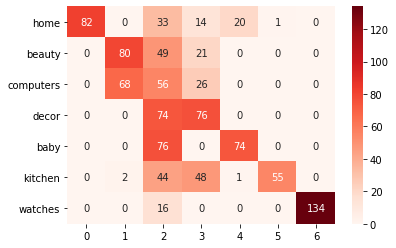

In [64]:
conf_mat = metrics.confusion_matrix(y_true, y_pred)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = y_pred.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [65]:
# ARI
ARI_BOW = metrics.adjusted_rand_score(y_true, y_pred_transform)
print(ARI_BOW)

0.2759114546543008


In [66]:
#save labels for plot
LABELS_BOW = y_pred_transform

## LDA

In [67]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df.description_processed.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'cm', 'height', 'pack', 'price', 'curtain', 'enhance', 'look', 'interior', 'curtain', 'make', 'high', 'quality']


In [68]:
import gensim.corpora as corpora
# Create Dictionary
# storing the extracted tokens into the dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 4), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 11), (21, 3), (22, 1), (23, 5), (24, 2), (25, 1), (26, 4), (27, 2), (28, 1), (29, 1)]


In [69]:
my_dictionary = corpora.Dictionary(data_words)
print(my_dictionary)

Dictionary(4274 unique tokens: ['abstract', 'amount', 'ant', 'anti', 'apart']...)


In [70]:
my_dictionary.save('/Users/riina//Downloads/my_dictionary.dict')

In [71]:
load_dict = corpora.Dictionary.load('/Users/riina//Downloads/my_dictionary.dict')

In [72]:
from gensim.test.utils import get_tmpfile
tmp_fname = get_tmpfile("dictionary")
my_dictionary.save_as_text(tmp_fname)

In [73]:
load_dict = corpora.Dictionary.load_from_text(tmp_fname)

In [74]:
BoW_corpus =[my_dictionary.doc2bow(doc, allow_update = True) for doc in data_words]

In [75]:
from gensim.corpora import MmCorpus
from gensim.test.utils import get_tmpfile
 
output_fname = get_tmpfile("BoW_corpus.mm")
 
# save corpus to disk
MmCorpus.serialize(output_fname, BoW_corpus)
 
# load corpus
load_corpus = MmCorpus(output_fname)

In [76]:
from pprint import pprint

# number of topics
num_topics = 7

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"cm" + 0.011*"feature" + 0.011*"product" + 0.010*"day" + '
  '0.010*"delivery" + 0.010*"price" + 0.009*"free" + 0.009*"buy" + '
  '0.009*"cash" + 0.009*"ship"'),
 (1,
  '0.022*"product" + 0.020*"flipkart" + 0.019*"com" + 0.018*"free" + '
  '0.018*"delivery" + 0.018*"ship" + 0.017*"cash" + 0.017*"buy" + '
  '0.017*"genuine" + 0.015*"cm"'),
 (2,
  '0.012*"print" + 0.011*"product" + 0.010*"color" + 0.010*"pack" + '
  '0.010*"laptop" + 0.010*"price" + 0.008*"specification" + 0.008*"type" + '
  '0.008*"set" + 0.008*"skin"'),
 (3,
  '0.012*"product" + 0.011*"make" + 0.010*"design" + 0.010*"price" + '
  '0.009*"light" + 0.009*"size" + 0.008*"specification" + 0.008*"mug" + '
  '0.008*"feature" + 0.008*"usb"'),
 (4,
  '0.020*"mug" + 0.015*"baby" + 0.010*"coffee" + 0.010*"girl" + 0.010*"watch" '
  '+ 0.010*"detail" + 0.009*"product" + 0.009*"fabric" + 0.009*"cotton" + '
  '0.009*"boy"'),
 (5,
  '0.010*"type" + 0.009*"product" + 0.009*"mug" + 0.009*"feature" + '
  '0.008*"replacemen

In [77]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()


In [78]:
LDAvis_data_filepath = os.path.join('/Users/riina//Downloads/my_dictionary.dict'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/Users/riina//Downloads/my_dictionary.dict'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.045932  0.080253       1        1  20.745465
6      0.073121 -0.005214       2        1  17.315502
0      0.021445  0.013462       3        1  14.289271
2     -0.023384  0.015062       4        1  13.220024
1      0.063649 -0.005496       5        1  12.361250
3     -0.054055 -0.055372       6        1  12.043238
5     -0.034844 -0.042695       7        1  10.025251, topic_info=         Term        Freq       Total Category  logprob  loglift
208  flipkart  426.000000  426.000000  Default  30.0000  30.0000
204       com  419.000000  419.000000  Default  29.0000  29.0000
658    coffee  159.000000  159.000000  Default  28.0000  28.0000
667       mug  440.000000  440.000000  Default  27.0000  27.0000
203      cash  509.000000  509.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
63       pack   23.779063  315.967331   Topic7  -5.4488  -0.2868
10        box   22.928321  277.837906   Topic7  -5.4852  -0.1946
209      free   25.017145  559.938420   Topic7  -5.3981  -0.8082
56      model   21.842543  210.948654   Topic7  -5.5338   0.0323
219     watch   21.411062  331.571487   Topic7  -5.5537  -0.4399

[587 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3279      4  0.119232     abkl
3279      5  0.715395     abkl
3279      7  0.119232     abkl
2214      1  0.049242  adapter
2214      2  0.155933  adapter
...     ...       ...      ...
1419      7  0.020655      yet
2663      1  0.101366       yl
2663      2  0.101366       yl
2663      3  0.709565       yl
4202      4  0.701563     zora

[1501 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 1, 3, 2, 4, 6])

## TF IDF

In [79]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler,  Normalizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import manifold, decomposition
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [80]:
df.category0 = pd.Categorical(df.category0)
df['code'] = df.category0.cat.codes

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/ipykernel_66709/1255643484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['code'] = df.category0.cat.codes


In [81]:
df['code'] = df.category0.cat.codes

/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/ipykernel_66709/1998429171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['code'] = df.category0.cat.codes


## TFIDF

In [82]:
X = df['description_processed']
y_true = df['code']

In [83]:
# create pipeline (updated with best params from gridsearch below)
vectorizer = CountVectorizer(stop_words = 'english', 
    max_df=0.5, min_df=0, ngram_range=(1, 1), max_features=3000)

kmeans = KMeans(n_clusters=7, random_state=0, max_iter=100, init='k-means++')

pipeline = Pipeline([('vect', vectorizer),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('to_array', FunctionTransformer(
                         lambda x: x.toarray(), accept_sparse=True)),
                     ('pca', decomposition.PCA(n_components=0.99, svd_solver='full')),
                     ('scaler',  Normalizer()),
                     ('kmeans', kmeans)])

In [84]:
# gridsearch
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer

# make scorer
score = make_scorer(metrics.adjusted_rand_score)

# Set grid search params
grid_params = [{'vect__max_df': (0.5, 0.7, 0.9),
                'vect__min_df': (0, 0.1, 0.3),
                'vect__ngram_range': ((1, 1), (1, 2)),
                'vect__max_features': (None, 1000, 3000),
                'kmeans__random_state': (0, 20, 40, 60),
                'kmeans__init': ('k-means++', 'random'),
                'kmeans__max_iter': [100, 120, 150]
                }]

# Construct grid search
gs_TFIDF = GridSearchCV(estimator=pipeline,
                        param_grid=grid_params,
                        scoring=score,
                        cv=[(slice(None), slice(None))])

gs_TFIDF.fit(X, y_true)
print('Best params are : %s' % gs_TFIDF.best_params_)

# Best training data accuracy
print('Best training score: %.3f' % gs_TFIDF.best_score_)

# Predict on test data with best params
y_pred = gs_TFIDF.predict(X)

/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


Best params are : {'kmeans__init': 'k-means++', 'kmeans__max_iter': 100, 'kmeans__random_state': 40, 'vect__max_df': 0.5, 'vect__max_features': 3000, 'vect__min_df': 0, 'vect__ngram_range': (1, 1)}
Best training score: 0.342


In [85]:
# fit best model
model = pipeline.fit(X)
y_pred = pd.Series(pipeline.predict(X))

In [86]:
y_pred

0       2
1       2
2       2
3       2
4       2
       ..
1045    2
1046    2
1047    2
1048    2
1049    2
Length: 1050, dtype: int32

In [87]:
categories

['home', 'beauty', 'computers', 'decor', 'baby', 'kitchen', 'watches']

In [88]:
y_true

0       4
1       0
2       0
3       4
4       4
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: code, Length: 1050, dtype: int8

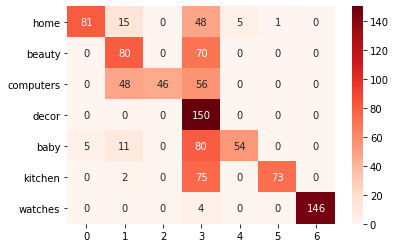

In [89]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(y_true, y_pred)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = y_pred.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [90]:
# ARI
ARI_TFIDF = metrics.adjusted_rand_score(y_true, y_pred)
print(ARI_TFIDF)

0.2662851201325656


In [91]:
outlier1= pd.DataFrame(X)
outlier2= pd.DataFrame(y_true)
outlier3= pd.DataFrame(y_pred)

In [92]:
outlier3.columns = ['predicted']
outlier3

,predicted
0,2
1,2
2,2
3,2
4,2
...,...
1045,2
1046,2
1047,2
1048,2


In [93]:
frames = [outlier1, outlier2, outlier3]
result = pd.concat(frames, axis=1)

In [94]:
outliers= result[result['code']==2]

In [95]:
outliers1= outliers[outliers['predicted']==0]

In [96]:
outliers2= outliers[outliers['predicted']==2]

In [97]:
# Save labels 
LABELS_TFIDF = y_pred_transform

In [98]:
X

0       key feature elegance polyester multicolor abst...
1       specification sathiyas cotton bath towel bath ...
2       key feature eurospa cotton terry face towel se...
3       key feature santosh royal fashion cotton print...
4       key feature jaipur print cotton floral king si...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker pack pr...
1047    buy uberlyfe extra large pigment polyvinyl fil...
1048    buy wallmantra medium vinyl sticker sticker r ...
1049    buy uberlyfe large vinyl sticker r online uber...
Name: description_processed, Length: 1050, dtype: object

In [99]:
pca = pca = decomposition.PCA(n_components=0.99, svd_solver='full')
n = 2
tsne = tsne = manifold.TSNE(n_components=n, perplexity=30,
                         n_iter=2000, init='random', random_state=6)

pipeline_viz = Pipeline([('vect', vectorizer),
                         ('to_array', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
                         ('pca', pca),
                          ('tsne', tsne)
                        ])

X_tsne_tfidf = pipeline_viz.fit_transform(X)

In [100]:
# create df
df_tsne_tfidf = pd.DataFrame(X_tsne_tfidf[:,:2], columns=['tsne1', 'tsne2'])
df_tsne_tfidf['product_category'] = df['code']
df_tsne_tfidf['category'] = y_true
#df_tsne_tfidf['clusters_kmeans']= LABELS_TFIDF
df_tsne_tfidf['clusters_nmf']= LABELS_TFIDF

In [101]:
# Set colors for plots
light_blue = '#2AC3F3'
blue_green = '#6BD8B6'
green = '#A9E04B'
dark_blue = '#004591'
yellow = '#F3C744'
red = '#F37768'
gray = '#7C8894'
colors = [light_blue, dark_blue, blue_green, green, yellow, red, gray]

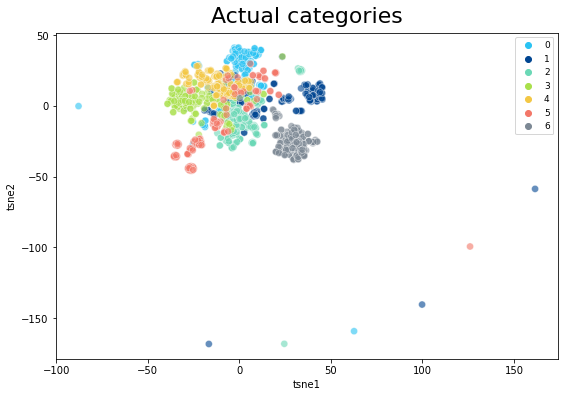

In [102]:
dftsne = df_tsne_tfidf.sort_values('product_category')
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsne,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

In [103]:
dftsne2= dftsne[dftsne['tsne2']>-50]

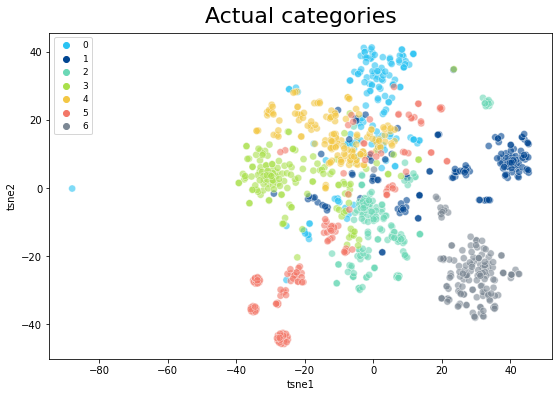

In [104]:
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsne2,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

## Word2vec

In [105]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
from time import time

In [106]:
# Pre-processing
tokenizer = nltk.RegexpTokenizer(r'\w+')
df['tokens']= df['description_processed'].apply(lambda x : tokenizer.tokenize(x))
sentences = df['tokens']

/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/ipykernel_66709/3352868250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens']= df['description_processed'].apply(lambda x : tokenizer.tokenize(x))


In [107]:
df

,description,category0,category1,description_processed,code,tokens
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key feature elegance polyester multicolor abst...,4,"[key, feature, elegance, polyester, multicolor..."
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specification sathiyas cotton bath towel bath ...,0,"[specification, sathiyas, cotton, bath, towel,..."
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key feature eurospa cotton terry face towel se...,0,"[key, feature, eurospa, cotton, terry, face, t..."
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key feature santosh royal fashion cotton print...,4,"[key, feature, santosh, royal, fashion, cotton..."
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key feature jaipur print cotton floral king si...,4,"[key, feature, jaipur, print, cotton, floral, ..."
...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...,0,"[oren, empower, extra, large, self, adhesive, ..."
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack pr...,0,"[wallmantra, large, vinyl, sticker, sticker, p..."
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigment polyvinyl fil...,0,"[buy, uberlyfe, extra, large, pigment, polyvin..."
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker r ...,0,"[buy, wallmantra, medium, vinyl, sticker, stic..."


In [108]:
w2v_model = Word2Vec(min_count=1,
                     window=4,
                     workers= 4)

In [109]:
# Build vocabulary table
t = time()
w2v_model.build_vocab(sentences, progress_per=10000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins


In [110]:
# Train mode;
t = time()
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.02 mins


In [111]:
# For eqch phrase we make a sum of vectors 
def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = np.vstack([sum_vectors(p, model) for p in X])
    return feats

wv_train_feat = word2vec_features(sentences, w2v_model)
wv_train_feat.shape

(1050, 100)

In [112]:
X_wv_train_feat, df_wv_train_feat = pca99(wv_train_feat)

dim before PCA :  (1050, 100)
dim after PCA :  (1050, 23)


In [113]:
#get words most similar to "kitchen"
w2v_model.wv.most_similar(positive=["kitchen"])

[('suttle', 0.8502164483070374),
 ('scissor', 0.8095600008964539),
 ('vibrancy', 0.8046750426292419),
 ('multifunction', 0.7948861718177795),
 ('cutlery', 0.7931539416313171),
 ('addition', 0.7777456641197205),
 ('wardrobe', 0.777664840221405),
 ('add', 0.7668474316596985),
 ('fab', 0.765659749507904),
 ('utensil', 0.7600213885307312)]

In [114]:
#get words most similar to "kitchen"
w2v_model.wv.most_similar(positive=["baby"])

[('strip', 0.8826023936271667),
 ('lilliput', 0.8737950921058655),
 ('girl', 0.8727309107780457),
 ('dongli', 0.8701083660125732),
 ('chocoberry', 0.868514895439148),
 ('lula', 0.8656063079833984),
 ('feetz', 0.8603968620300293),
 ('gather', 0.8602895736694336),
 ('romper', 0.8574338555335999),
 ('bodysuit', 0.8562705516815186)]

In [115]:
#get words most similar to "kitchen"
w2v_model.wv.most_similar(positive=["computer"])

[('vacuum', 0.9405791759490967),
 ('vent', 0.9029926657676697),
 ('dust', 0.8785722255706787),
 ('keyboard', 0.8711186647415161),
 ('port', 0.869096040725708),
 ('device', 0.866685688495636),
 ('requirement', 0.8654290437698364),
 ('mobile', 0.8618201017379761),
 ('beloved', 0.8614265322685242),
 ('xyz', 0.8581116199493408)]

In [116]:
#get words most similar to "kitchen"
w2v_model.wv.most_similar(positive=["decor"])

[('decorate', 0.8693896532058716),
 ('creativity', 0.8519770503044128),
 ('home', 0.8491171002388),
 ('cor', 0.8444727063179016),
 ('garden', 0.8147333264350891),
 ('pride', 0.79315584897995),
 ('vibrant', 0.7888057231903076),
 ('office', 0.7846607565879822),
 ('spunk', 0.7829524278640747),
 ('flazee', 0.7809776663780212)]

In [117]:
#get words most similar to "kitchen"
w2v_model.wv.most_similar(positive=["watch"])

[('sl', 0.9318953156471252),
 ('ym', 0.9216644167900085),
 ('men', 0.9138601422309875),
 ('j', 0.9134750366210938),
 ('yl', 0.90999835729599),
 ('cpgi', 0.9038284420967102),
 ('prsmd', 0.900620698928833),
 ('pp', 0.900428056716919),
 ('pk', 0.9003317356109619),
 ('analog', 0.9001865983009338)]

In [118]:
# make clusters
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans.fit(X_wv_train_feat)
y_pred = kmeans.labels_

In [119]:
LABELS_W2V = y_pred_transform

In [120]:
df12= pd.DataFrame(kmeans.labels_, columns = ['Column_A'])
df12

,Column_A
0,5
1,3
2,5
3,5
4,5
...,...
1045,5
1046,5
1047,1
1048,1


In [121]:
df23 = df12["Column_A"]
df23

0       5
1       3
2       5
3       5
4       5
       ..
1045    5
1046    5
1047    1
1048    1
1049    1
Name: Column_A, Length: 1050, dtype: int32

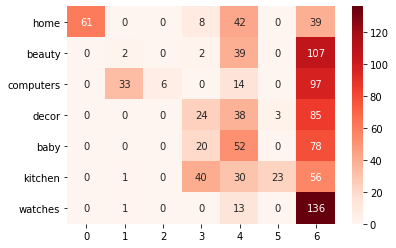

In [122]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(y_true, df23)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = df23.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [123]:
# ARI
ARI_W2V = metrics.adjusted_rand_score(y_true, y_pred)
print(ARI_W2V)

0.05613313243023665


## Universal Sentence Encoder

In [124]:
import tensorflow_hub as hub

In [125]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

2022-01-21 07:32:25.324144: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-21 07:32:29.332450: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [126]:
embeddings = embed(data)

In [127]:
print(embeddings)

tf.Tensor(
[[-0.05313345 -0.05335029  0.01701597 ...  0.04609688  0.0389507
  -0.0354351 ]
 [-0.04505126 -0.04864699 -0.00403906 ...  0.02970058  0.03135629
   0.01626785]
 [-0.05374872 -0.05019253 -0.01644756 ...  0.04867152 -0.03173299
  -0.04991819]
 ...
 [-0.00479776 -0.05075457  0.01847761 ... -0.05316433  0.04329825
  -0.05382344]
 [-0.02601579 -0.05226224  0.03394312 ...  0.02035107 -0.01238511
  -0.00977906]
 [-0.04655476 -0.04521005  0.01941035 ...  0.02409776 -0.00889808
  -0.00372402]], shape=(1050, 512), dtype=float32)


In [128]:
y_true=list(y_true) 

In [129]:
X = embeddings
y_true = df['code']

In [130]:
# create pipeline (updated with best params from gridsearch below)
kmeans = KMeans(n_clusters=7, random_state=0, max_iter=100, init='k-means++')

pipeline = Pipeline([('kmeans', kmeans)])

In [131]:
# gridsearch
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer

# make scorer
score = make_scorer(metrics.adjusted_rand_score)

# Set grid search params
grid_params = [{
                'kmeans__random_state': (0, 20, 40, 60),
                'kmeans__init': ('k-means++', 'random'),
                'kmeans__max_iter': [100, 120, 150]
                }]

# Construct grid search
gs_USE = GridSearchCV(estimator=pipeline,
                        param_grid=grid_params,
                        scoring=score,
                        cv=[(slice(None), slice(None))])

gs_USE.fit(X, y_true)
print('Best params are : %s' % gs_USE.best_params_)

# Best training data accuracy
print('Best training score: %.3f' % gs_USE.best_score_)

# Predict on test data with best params
y_pred = gs_USE.predict(X)

Best params are : {'kmeans__init': 'random', 'kmeans__max_iter': 100, 'kmeans__random_state': 60}
Best training score: 0.344


In [132]:
# fit best model
model = pipeline.fit(X)
y_pred = pd.Series(pipeline.predict(X))

In [133]:
categories

['home', 'beauty', 'computers', 'decor', 'baby', 'kitchen', 'watches']

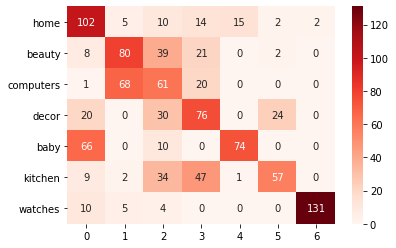

In [134]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(y_true, y_pred)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = y_pred.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [135]:
# ARI
ARI_USE = metrics.adjusted_rand_score(y_true, y_pred)
print(ARI_USE)

0.31783515912696503


In [136]:
# Save labels 
LABELS_USE = y_pred_transform

In [137]:
pca = pca = decomposition.PCA(n_components=0.99, svd_solver='full')
n = 2
tsne = tsne = manifold.TSNE(n_components=n, perplexity=30,
                         n_iter=2000, init='random', random_state=6)

pipeline_viz = Pipeline([
                         
                         ('pca', pca),
                          ('tsne', tsne)
                        ])

X_tsne_use = pipeline_viz.fit_transform(X)

In [138]:
# create df
df_tsne_use = pd.DataFrame(X_tsne_use[:,:2], columns=['tsne1', 'tsne2'])
df_tsne_use['product_category'] = df['code']
df_tsne_use['category'] = y_true
df_tsne_use['clusters_nmf']= LABELS_USE

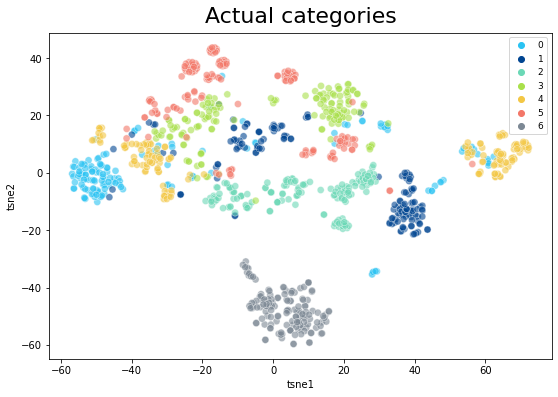

In [139]:
dftsneuse = df_tsne_use.sort_values('product_category')
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsneuse,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

In [140]:
print(ARI_BOW)
print(ARI_TFIDF)
print(ARI_W2V)
print(ARI_USE)

0.2759114546543008
0.2662851201325656
0.05613313243023665
0.31783515912696503


## Image classification

In [141]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [142]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [143]:
textdf=pd.read_csv('/Users/riina//Downloads/flipkart_com-ecommerce_sample_1050.csv')
textdf['product_category_tree'] = textdf['product_category_tree'].astype('string')
textdf[['category','a','b']] = textdf['product_category_tree'].str.split('>>',2,expand=True)
textdf["category"]= textdf["category"].str[2:]
textdf["category"] = textdf["category"].str[:-1]

In [144]:
text=textdf[['image','category']]
text=text.sort_values('category')
text=text.reset_index(drop=True)
text

,image,category
0,f2f027ad6a6df617c9f125173da71e44.jpg,Baby Care
1,4e03d4e81e6a876f512536f6a57c053e.jpg,Baby Care
2,44218245b37581c534038cc27d081093.jpg,Baby Care
3,967d91e162afb44a67c0281f71766e4d.jpg,Baby Care
4,4b500e244f11a45f5171bd3665413044.jpg,Baby Care
...,...,...
1045,8d1abb3504a19ab41e7d8b8b1d5dd839.jpg,Watches
1046,c7d81193e868b50355412ced7a67f8f3.jpg,Watches
1047,66b75f053cb7626f49f1a9bffe77b451.jpg,Watches
1048,2541b59d54a3a9f2681c0049f7ddd85c.jpg,Watches


In [145]:
text.category = pd.Categorical(text.category)
text['code'] = text.category.cat.codes

In [146]:
textdf

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category,a,b
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains >> Elegance Polyester Multicolor Abs...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels >> Sathiyas Baby Bath Towels...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels >> Eurospa Baby Bath Towels ...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets >> SANTOSH ROYAL FASHION Bedsheets ...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets >> Jaipur Print Bedsheets >> Jaipur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,"Stickers >> Oren Empower Stickers""]"
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Baby & Kids Gifts,"Stickers >> Wallmantra Stickers""]"
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-

In [147]:
finaldf=text[['image','category']]

In [148]:
finaldf.to_csv('imagefinaldf.csv')

In [149]:
img_directory= os.path.join(os.getcwd(),r"/Users/riina/Downloads/Flipkart/Images")

In [150]:
path = r"/Users/riina/Downloads/Flipkart/Images/"
from os import listdir
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1052


In [151]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

Baby Care


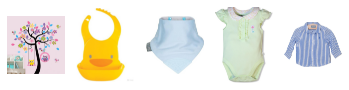

Beauty and Personal Care


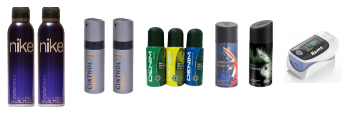

Computers


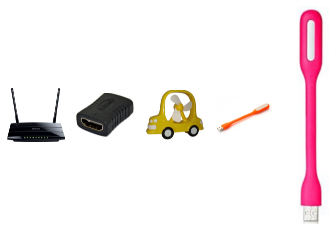

Home Decor & Festive Needs


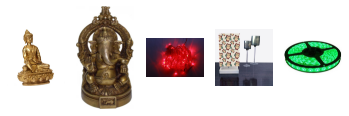

Home Furnishing


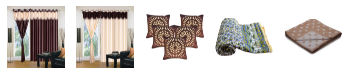

Kitchen & Dining


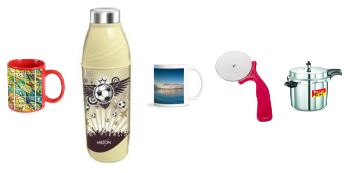

Watches


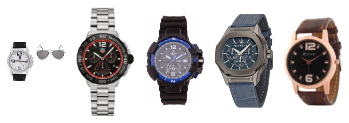

In [152]:
df_img= text.loc[:,["image","category","code"]]

from matplotlib.image import imread
import matplotlib.pyplot as plt

for cat in df_img.category.unique() :
    df_cat = df_img[df_img.category == cat]
    print(cat)
    print("================")
    for i in range(5):
        plt.subplot(1,5,i+1)
        filename = os.path.join(img_directory,df_cat.iloc[i,0])
        image = imread(filename)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

Baby Care


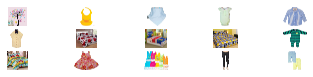

Beauty and Personal Care


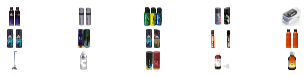

Computers


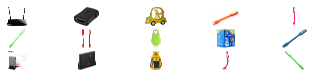

Home Decor & Festive Needs


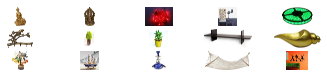

Home Furnishing


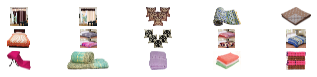

Kitchen & Dining


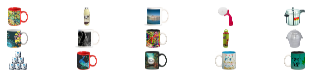

Watches


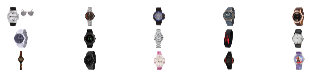

In [153]:
df_img= text.loc[:,["image","category","code"]]

from matplotlib.image import imread
import matplotlib.pyplot as plt

for cat in df_img.category.unique() :
    df_cat = df_img[df_img.category == cat]
    print(cat)
    print("================")
    for i in range(15):
        plt.subplot(10,5,i+1)
        filename = os.path.join(img_directory,df_cat.iloc[i,0])
        image = imread(filename)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

## Sift

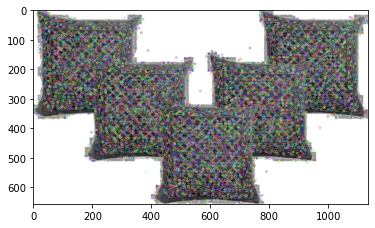

Descripteurs :  (11092, 128)

[[  1.   1.   1. ...   2.   7.   5.]
 [106. 102.   1. ...   0.   0.   0.]
 [ 32.   0.   0. ...   0.   0.   0.]
 ...
 [  1.   7.   7. ...  17.   7.   5.]
 [ 91.  15.   3. ...   6.   5.   0.]
 [  0.   0.   0. ...   2.   1.   5.]]


In [162]:
import cv2

sift = cv2.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

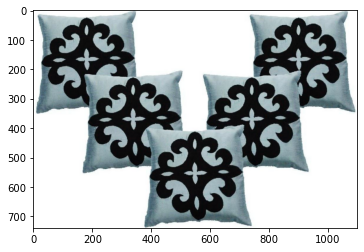

In [163]:
before=cv2.imread("/Users/riina/Downloads/Flipkart/Images/e56ffc10078972b5f4e7302383db8d72.jpg")
plt.imshow(before)
plt.show()

In [157]:
dict_cat = {'home furnishing': 'home','beauty and personal care': 'beauty', 'computers': 'computers', 'home decor festive needs': 'decor',
            'baby care': 'baby','kitchen dining': 'kitchen','watches': 'watches'}
categories = list(dict_cat.values())

In [164]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100


error: OpenCV(4.5.5) /private/var/folders/ym/0dspvgrx5d5c7jglsy03b4w80000gp/T/pip-install-r5grduki/opencv-python_d6be2507193b4092bf50eb17dc0b9635/opencv/modules/features2d/src/sift.dispatch.cpp:477: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'


In [ ]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=7, init='k-means++', random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

In [ ]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = text["code"]
print(df_tsne.shape)

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [ ]:
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer

In [ ]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = text["code"]


In [ ]:
df_tsne

In [ ]:
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [ ]:
fmatrix=df_tsne[['class','cluster']]

In [ ]:
fmatrix

In [ ]:
testy = df_tsne["class"]

In [ ]:
testx=df_tsne["cluster"]

In [ ]:
df12= pd.DataFrame(cls.labels_, columns = ['Column_A'])
df12

In [ ]:
df23 = df12["Column_A"]
df23

In [ ]:
testi=cls.labels_
testi

In [ ]:
def conf_mat_transform(conf_mat) :
    '''function to re-assign clusters by maximizing the diagonal of the confusion matrix'''

    # Inverse the number of items per categories (in order to use following function)
    conf_mat_temp = 1 /(conf_mat + 0.001)
    
    # apply function to get the combination of columns to minimize the diagonal 
    from scipy.optimize import linear_sum_assignment
    row_ind, col_ind = linear_sum_assignment(conf_mat_temp)

    # transform matrix according to new columns combination
    conf_mat_transform = conf_mat[:, col_ind]
    
    # reverse liste of column index
    corresp = col_ind.tolist()
    
    return corresp, conf_mat_transform

In [ ]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(labels,df23)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = df23.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [ ]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(testy,testx)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = testx.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [ ]:
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))